In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
data = pd.read_excel('C:/Users/pedro/Documents/DADOS/Analise IFood GPT/analise_logistica.xlsx')

data.head()

,id_cliente,nome,idade,genero,cidade,data_adesao_clube,ano,mês,mes_ano,plano_clube,...,visitas,cancelamentos,genero.1,cidade.1,classificacao_idade,classificação_regiao,RFM,RFM_colocacao,Unnamed: 25,Ticket Médio
0,1,Cliente_1,58,F,São Paulo,2022-07-30,2022,7,2022-07,Premium,...,0,0,F,São Paulo,51-60,Sudeste,Lealdade potencial,9,NaN,55.44175
1,2,Cliente_2,25,F,Salvador,2020-05-10,2020,5,2020-05,Premium,...,0,0,F,Salvador,21-30,Nordeste,Não classificado,0,NaN,NaN
2,3,Cliente_3,19,F,São Paulo,2021-09-29,2021,9,2021-09,Básico,...,3,0,F,São Paulo,até 20,Sudeste,Clientes que precisam de atenção,6,NaN,NaN
3,4,Cliente_4,65,F,Salvador,2021-06-30,2021,6,2021-06,Básico,...,0,0,F,Salvador,+60,Nordeste,Hibernando,2,NaN,NaN
4,5,Cliente_5,35,M,Rio de Janeiro,2020-01-28,2020,1,2020-01,Premium,...,0,0,M,Rio de Janeiro,31-40,Sudeste,Não classificado,0,NaN,NaN


In [3]:
# Definir limites para "alto valor" e "baixa retenção"
# Aqui, consideramos como "alto valor" os clientes acima do 75º percentil de valor gasto
# e "baixa retenção" aqueles com tempo de vida abaixo do 25º percentil
valor_gasto_limite = data['total_valor'].quantile(0.75)
tempo_vida_limite = data['tempo_vida_dias'].quantile(0.25)

# Filtrar os clientes de alto valor e baixa retenção
alto_valor_baixa_retencao = data[(data['total_valor'] >= valor_gasto_limite) & 
                                 (data['tempo_vida_dias'] <= tempo_vida_limite)]

print("Clientes com alto valor de transação e baixa retenção:")
print(alto_valor_baixa_retencao)

# Sugestões:
# 1. Programas de fidelidade ou recompensas exclusivas para esse público.
# 2. Ofertas personalizadas ou bônus para incentivar maior engajamento.
# 3. Implementação de uma comunicação de pós-venda, como emails de agradecimento e sugestões.

Clientes com alto valor de transação e baixa retenção:
     id_cliente         nome  idade genero          cidade data_adesao_clube  \
42           43   Cliente_43     31      M  Belo Horizonte        2022-09-01   
48           49   Cliente_49     40      M  Rio de Janeiro        2022-09-07   
76           77   Cliente_77     35      M  Belo Horizonte        2022-09-13   
116         117  Cliente_117     38      F       São Paulo        2022-03-12   
146         147  Cliente_147     28      F        Salvador        2022-09-15   
150         151  Cliente_151     22      M       São Paulo        2022-04-07   
151         152  Cliente_152     42      F  Belo Horizonte        2022-07-30   
162         163  Cliente_163     61      F  Rio de Janeiro        2022-05-22   
168         169  Cliente_169     36      M    Porto Alegre        2022-06-21   
180         181  Cliente_181     58      M       São Paulo        2022-05-21   
190         191  Cliente_191     51      F  Rio de Janeiro       

Categorias de Restaurantes mais populares:
categoria_restaurante
Brasileira    49
Italiana      42
Name: frequencia_compra, dtype: int64

Categorias de Restaurantes menos populares:
categoria_restaurante
Saudável    36
Pizza       33
Name: frequencia_compra, dtype: int64


C:\Users\pedro\AppData\Local\Temp\ipykernel_9352\3738481532.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias_popularidade.index, y=categorias_popularidade.values, palette='viridis')


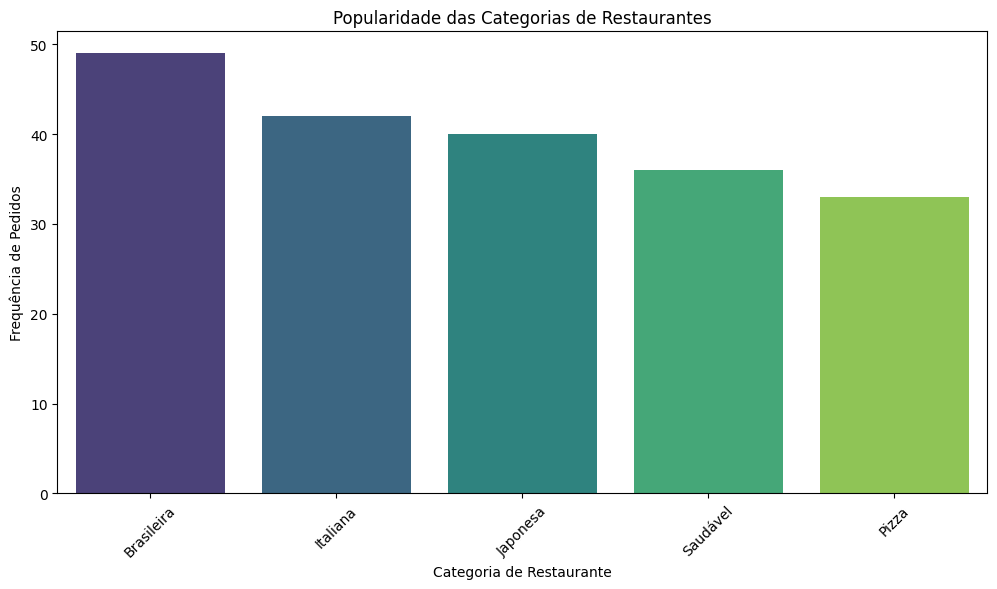

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
data_2 = pd.read_excel('C:/Users/pedro/Documents/DADOS/Analise IFood GPT/analise_categoria_restaurante.xlsx')

# Supor que há uma coluna 'categoria_restaurante' indicando a categoria do restaurante
# e que 'frequencia_compra' indica a quantidade de vezes que o cliente pediu nessa categoria

# Contar a frequência de cada categoria
categorias_popularidade = data_2.groupby('categoria_restaurante')['frequencia_compra'].sum().sort_values(ascending=False)

# Mostrar as categorias mais populares e menos populares
print("Categorias de Restaurantes mais populares:")
print(categorias_popularidade.head(2))  # Top 5

print("\nCategorias de Restaurantes menos populares:")
print(categorias_popularidade.tail(2))  # Bottom 5

# Visualizar graficamente as categorias de restaurantes
plt.figure(figsize=(12, 6))
sns.barplot(x=categorias_popularidade.index, y=categorias_popularidade.values, palette='viridis')
plt.title("Popularidade das Categorias de Restaurantes")
plt.xlabel("Categoria de Restaurante")
plt.ylabel("Frequência de Pedidos")
plt.xticks(rotation=45)
plt.show()

# Sugestões:
# 1. Promover categorias menos populares com campanhas especiais ou descontos.
# 2. Parcerias com restaurantes de categorias populares para promoções exclusivas.
# 3. Criar "eventos" semanais focados em categorias específicas para estimular o consumo.

Impacto dos planos Premium e Básico no LTV e engajamento:
              LTV Médio  Frequência Média de Compra  \
plano_clube                                           
Básico       131.857297                    1.037383   
Premium      146.246897                    0.956989   

             Tempo de Vida Médio (dias)  
plano_clube                              
Básico                      1257.514019  
Premium                     1251.569892  


C:\Users\pedro\AppData\Local\Temp\ipykernel_9352\3825306281.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plano_analise.index, y=plano_analise['LTV Médio'], palette='Blues')


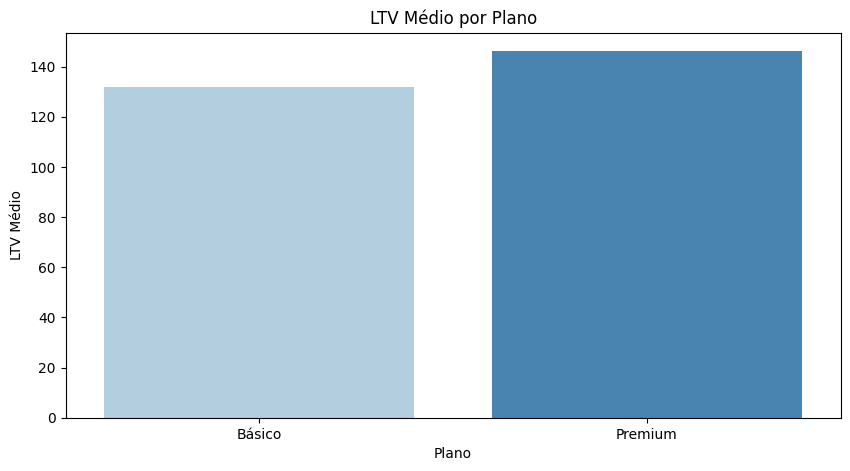

C:\Users\pedro\AppData\Local\Temp\ipykernel_9352\3825306281.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plano_analise.index, y=plano_analise['Frequência Média de Compra'], palette='Greens')


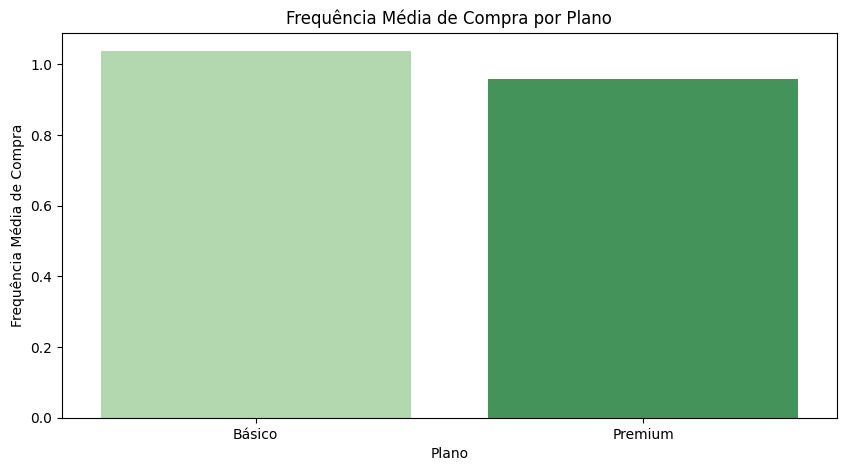

In [15]:
# Supondo que existe uma coluna 'plano' que indica se o cliente é 'Premium' ou 'Básico'

# Calcular o LTV como o valor gasto médio * frequência de compra * tempo de vida (em meses)
data['LTV'] = data['frequencia_compras'] * data['tempo_vida'] *  ([55.44]) #(data['tempo_vida_dias'] / 30)

# Agrupar por plano e calcular o LTV médio e a frequência de compra média
plano_analise = data.groupby('plano_clube').agg({
    'LTV': 'mean',
    'frequencia_compras': 'mean',
    'tempo_vida_dias': 'mean'
}).rename(columns={
    'LTV': 'LTV Médio',
    'frequencia_compras': 'Frequência Média de Compra',
    'tempo_vida_dias': 'Tempo de Vida Médio (dias)'
})

print("Impacto dos planos Premium e Básico no LTV e engajamento:")
print(plano_analise)

# Visualizar graficamente o impacto dos planos
plt.figure(figsize=(10, 5))
sns.barplot(x=plano_analise.index, y=plano_analise['LTV Médio'], palette='Blues')
plt.title("LTV Médio por Plano")
plt.xlabel("Plano")
plt.ylabel("LTV Médio")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=plano_analise.index, y=plano_analise['Frequência Média de Compra'], palette='Greens')
plt.title("Frequência Média de Compra por Plano")
plt.xlabel("Plano")
plt.ylabel("Frequência Média de Compra")
plt.show()

# Sugestões:
# 1. Se o plano Premium tem um LTV significativamente maior, considerar aumentar os incentivos para clientes migrarem do plano Básico.
# 2. Se o engajamento no plano Básico é baixo, melhorar os benefícios do plano Premium para estimular a transição.
# 3. Introduzir recompensas de engajamento para clientes do plano Básico que utilizem o serviço com mais frequência.